<a href="https://colab.research.google.com/github/nchibana/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None, na_values=["?"])
print(df.shape)
df.head()

(690, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [0]:
df = df.rename(columns={0: 'A1', 
                        1: 'A2', 
                        2: 'A3', 
                        3: 'A4', 
                        4: 'A5', 
                        5:'A6', 
                        6: 'A7', 
                        7: 'A8', 
                        8: 'A9', 
                        9: 'A10', 
                        10: 'A11', 
                        11: 'A12', 
                        12: 'A13', 
                        13: 'A14', 
                        14:'A15', 
                        15: 'A16'})

df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [0]:
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
df.replace('?', np.NaN)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


In [0]:
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

In [0]:
df['A11'] = df['A11'].astype(float)
df['A15'] = df['A15'].astype(float)
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

##Exploring the data


In [0]:
df.describe(exclude="number")

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [0]:
df.describe(exclude='object')

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


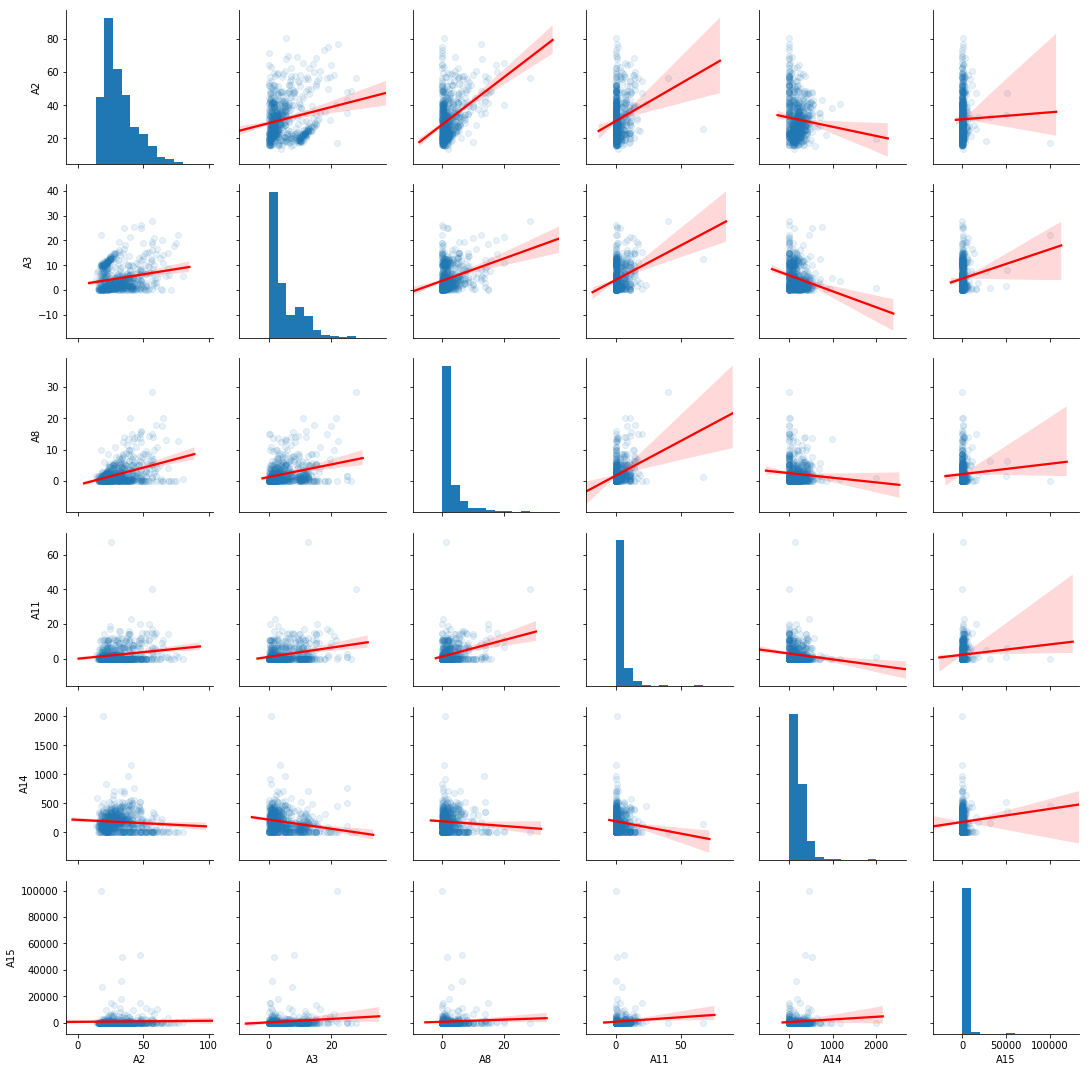

In [0]:
import seaborn as sns
g = sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}});

In [0]:
approved = df[df['A16'] == '+']

rejected = df[df['A16'] == '-']

##Two Features to Run T-Tests

In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
ttest_ind(approved['A2'], rejected['A2'], nan_policy='omit')

Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)

Null Hypothesis: The mean of 'approved' for A2 == The mean of 'rejected' for A2.

Alternative Hypothesis: The means are different

P - value: 0.00002766

Given the results of the above test, I would REJECT the null hypotheis that the mean of 'approved' for A2 is the same as the mean of 'rejected' for A2.

In [0]:
ttest_ind(approved['A3'], rejected['A3'], nan_policy='omit')

Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)

Null Hypothesis: The mean of 'approved' for A3 == The mean of 'rejected' for A3.

Alternative Hypothesis: The means are different

P - value: 0.0000000455168

Given the results of the above test, I would REJECT the null hypotheis that the mean of 'approved' for A3 is the same as the mean of 'rejected' for A3.

In [0]:
ttest_ind(approved['A8'], rejected['A8'], nan_policy='omit')

Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)

Null Hypothesis: The mean of 'approved' for A8 == The mean of 'rejected' for A8.

Alternative Hypothesis: The means are different

P - value: 0.00000000000000000367

Given the results of the above test, I would REJECT the null hypotheis that the mean of 'approved' for A8 is the same as the mean of 'rejected' for A8.

In [0]:
ttest_ind(approved['A11'], rejected['A11'], nan_policy='omit')

Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)

**THIS IS THE FEATURE WITH GREATEST DIFFERENCE BETWEEN MEANS**

Null Hypothesis: The mean of 'approved' for A11 == The mean of 'rejected' for A11.

Alternative Hypothesis: The means are different

P - value: 7.9577e-29

Given the results of the above test, I would REJECT the null hypotheis that the mean of 'approved' for A11 is the same as the mean of 'rejected' for A11.

In [0]:
ttest_ind(approved['A14'], rejected['A14'], nan_policy='omit')

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

**THIS IS THE FEATURE WITH LOWEST DIFFERENCE BETWEEN MEANS**

Null Hypothesis: The mean of 'approved' for A14 == The mean of 'rejected' for A14.

Alternative Hypothesis: The means are different

P - value: 0.008586


Given the results of the above test, I would REJECT the null hypotheis that the mean of 'approved' for A14 is the same as the mean of 'rejected' for A14.

In [0]:
ttest_ind(approved['A15'], rejected['A15'], nan_policy='omit')

Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)

##Run Tests on Categorical Features 

In [0]:
contingency_table = pd.crosstab(df['A16'], df['A1'], margins=True)
contingency_table

A1,a,b,All
A16,,,
+,98,206,304
-,112,262,374
All,210,468,678


In [0]:
observed = pd.crosstab(df['A16'], df['A1']).values
observed

array([[ 98, 206],
       [112, 262]])

In [0]:
from scipy import stats

In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 0.31128326491619945
P-value: 0.5768937883001117
Degrees of Freedom: 1
Expected: 
 [[ 94.15929204 209.84070796]
 [115.84070796 258.15929204]]


**THIS IS THE FEATURE WITH LOWEST DIFFERENCE BETWEEN EXPECTED AND OBSERVED VALUES**

**I FAIL TO REJECT the null hypothesis that A1 and A16 (accepted or rejected) are independent.**

In [0]:
observed_two = pd.crosstab(df['A16'], df['A4']).values
observed_two

array([[  2, 256,  45],
       [  0, 263, 118]])

In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed_two)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[  0.88596491 229.90789474  72.20614035]
 [  1.11403509 289.09210526  90.79385965]]


***I REJECT the null hypothesis that A4 and A16 (accepted or rejected) are independent.***

In [0]:
observed_three_ = pd.crosstab(df['A16'], df['A5']).values
observed_three_

array([[256,   2,  45],
       [263,   0, 118]])

In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed_three_)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[229.90789474   0.88596491  72.20614035]
 [289.09210526   1.11403509  90.79385965]]


***I REJECT the null hypothesis that A5 and A16 (accepted or rejected) are independent.***

In [0]:
observed_four = pd.crosstab(df['A16'], df['A6']).values
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed_four)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 98.32520342679135
P-value: 3.4999300402715717e-15
Degrees of Freedom: 13
Expected: 
 [[24.02643172 60.95594714 18.24229075 13.34801762 11.12334802 23.5814978
  26.25110132  4.44933921 22.69162996 16.90748899 34.70484581  1.33480176
  28.47577093 16.90748899]
 [29.97356828 76.04405286 22.75770925 16.65198238 13.87665198 29.4185022
  32.74889868  5.55066079 28.30837004 21.09251101 43.29515419  1.66519824
  35.52422907 21.09251101]]


In [0]:
observed_five = pd.crosstab(df['A16'], df['A7']).values
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed_five)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 45.034207140240554
P-value: 3.625452872372267e-07
Degrees of Freedom: 8
Expected: 
 [[ 26.25110132   2.66960352  25.36123348  61.40088106   3.55947137
    1.77973568   0.88986784 177.52863436   3.55947137]
 [ 32.74889868   3.33039648  31.63876652  76.59911894   4.44052863
    2.22026432   1.11013216 221.47136564   4.44052863]]


In [0]:
observed_six_ = pd.crosstab(df['A16'], df['A9']).values
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed_six_)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 355.2038167412799
P-value: 3.1185900878457007e-79
Degrees of Freedom: 1
Expected: 
 [[146.38115942 160.61884058]
 [182.61884058 200.38115942]]


**THIS IS THE FEATURE WITH THE HIGHEST DIFFERENCE BETWEEN EXPECTED AND OBSERVED VALUES**

**I REJECT the null hypothesis that A9 and A16 (accepted or rejected) are independent.**

In [0]:
observed_seven = pd.crosstab(df['A16'], df['A10']).values
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed_seven)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 143.06956205083145
P-value: 5.675727374527571e-33
Degrees of Freedom: 1
Expected: 
 [[175.74637681 131.25362319]
 [219.25362319 163.74637681]]


In [0]:
observed_nine = pd.crosstab(df['A16'], df['A12']).values
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed_nine)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 0.568273300792113
P-value: 0.45094587758631943
Degrees of Freedom: 1
Expected: 
 [[166.40289855 140.59710145]
 [207.59710145 175.40289855]]


In [0]:
observed_ten = pd.crosstab(df['A16'], df['A13']).values
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed_ten)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 9.191570451545383
P-value: 0.010094291370456362
Degrees of Freedom: 2
Expected: 
 [[278.07971014   3.55942029  25.36086957]
 [346.92028986   4.44057971  31.63913043]]


In [77]:
pd.crosstab(df['A16'], df['A9'])

A9,f,t
A16,,
+,23,284
-,306,77


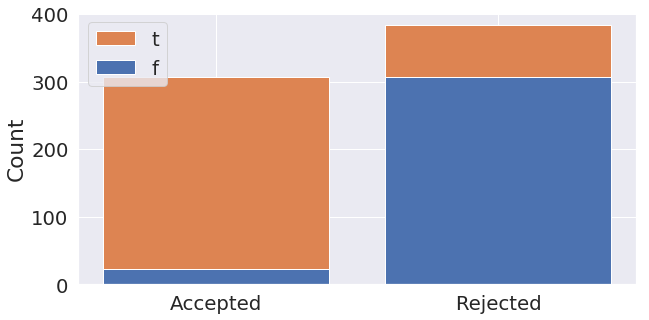

In [91]:
accepted = observed_six_[:,0]
rejected = observed_six_[:,1]

fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["Accepted","Rejected"]
p1 = plt.bar(categories, accepted)
p2 = plt.bar(categories, rejected, bottom=accepted)
plt.legend((p2[0], p1[0]), ('t', 'f'))
plt.ylabel('Count')
plt.show()

In [89]:
pd.crosstab(df['A16'], df['A1'])

A1,a,b
A16,,
+,98,206
-,112,262


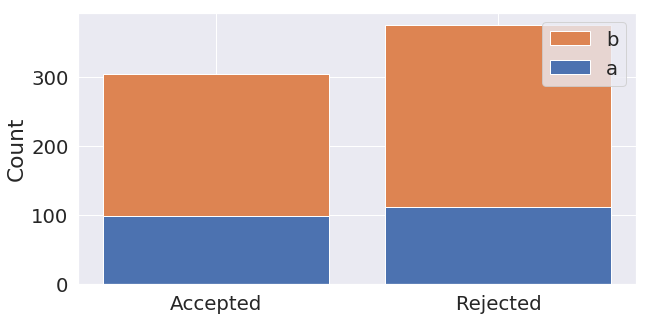

In [93]:
accepted_a1 = observed[:,0]
rejected_a1 = observed[:,1]

fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["Accepted","Rejected"]
p1 = plt.bar(categories, accepted_a1)
p2 = plt.bar(categories, rejected_a1, bottom=accepted_a1)
plt.legend((p2[0], p1[0]), ('b', 'a'))
plt.ylabel('Count')
plt.show()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

##Interpretation of T-Tests





Judging from the results of the various t-tests I ran, I can conclude that the **mean of attribute A11 for those approved is not the same as the mean for those rejected** (p-value: 7.96e-29). SInce this is the feature with the **greatest difference between means**, this may possibly indicate that this is the feature with the greatest influence on whether applicants were approved or not, but it still needs to be researched further.

I can also conclude that the mean of attribute A14 for those approved is not the same as the mean for those rejected for attribute A14 (P - value: 0.0086). However, this is the quantitative **feature with the lowest difference between the means**, which might possibly indicate that this is the one with the lowest bearing on whether applicants were approved or not, but, as with above statement, this needs to be researched further as we do not know what these categories represent.

##Interpretation of Chi-squared tests

Judging from the results of the Chi-squared tests I ran, I can reject the null hypothesis that A9 and A16 (accepted or rejected) are independent, which means that they may be related in some way (P-value: 3.12e-79). Additionally, I can conclude that this is the **feature with the greatest difference between expected and observed values**. From the plot below, you can also see that there is a significant difference in the proportion of accepted to rejected between 't' and 'f' of the A9 attribute.

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAokAAAFACAYAAADQ2ObAAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzt3XtcVXW+//E3VxNBCwe8kaKNmJfU%0A5GalQ6mj4y3QzPslrHH0aNpRy+k4EzTp6dGUlto8cpyjpWcSMq+JZpNpHDEFEbMMTEvBu6KiclGu%0A6/cHP/awWyhsBfdGXs/Hw8dD1vru7/6sbfvbm+/6rrWcDMMwBAAAAJTjbO8CAAAA4HgIiQAAADAh%0AJAIAAMCEkAgAAAATQiIAAABMCIkAAAAwISQCAADAxCFD4qZNm9SuXTu1a9dO69evr7CNYRiKiYlR%0ARESEOnfurJCQEE2ZMkVpaWk37Tc1NVWTJ09WSEiIOnfurIiICMXGxopbRQIAAFhzuJB4/vx5zZs3%0ATx4eHrds9/rrrys6OlrXrl3T6NGj1a9fPyUmJmr48OFKTk42tU9OTtaIESOUkJCgsLAwjRs3TkVF%0ARYqKitJf/vKXmjocAACAWsnJ0Z648vzzzys9PV19+/bVihUr9Oabb2ro0KFWbfbt26exY8fK399f%0Aa9eulZeXlyQpLS1Nw4cPV/PmzbV161a5uLhIkoqKijRw4EClp6dr2bJlCgsLkyQVFBQoMjJSycnJ%0A+vjjjxUUFHR3DxYAAMBBOdRM4urVq7V7927Nnz//ljOJsbGxkqQpU6ZYAqIktW/fXoMGDVJ6eroS%0AExMt2xMTE5Wenq7Q0FBLQJQkd3d3zZgxw6pPAAAAOFBIPHHihN5++22NHj1a3bt3v2XbpKQkSdIT%0ATzxh2tejRw9JsgqJZe3L9pUXGBgoDw8PSxsAAAA4SEgsKSnRnDlz5O3trdmzZ9+ybV5eni5cuCAP%0ADw/5+PiY9rdq1UqSlJGRYdl2/Phxq33lubi4yM/PT+fPn9f169fv5DAAAADuGa72LkCSli9frgMH%0ADmjlypWVXrCSnZ0tSVanmcvz9PS0aidJOTk5t3xNgwYNLK+pX7++bcUDAADcg+weEo8cOaLFixdr%0AzJgxCg0NtXc5Nrl0KUclJQ513Q8cjI+PlzIzsytvCAC3iXEGlXF2dlLjxp62v64GarHJnDlz1KRJ%0AE82aNatK7ctmA8vPFJZX0axhRbOL5eXm5ppeAwAAUJfZfSYxNTVVkvToo49WuP/VV1/Vq6++qmnT%0ApunFF1+Uh4eHfH19deHCBWVmZprWJZatRSy//rB169ZW+8orLi7WqVOn1KRJE041AwAA/H92D4nD%0Ahg2rcHtqaqpSU1MVHBysVq1aqUOHDpZ9ISEhiouL0+7duxUREWH1uoSEBEmyOnUdEhKipUuXKiEh%0AQZMmTbJqv3//fuXl5al3797VdUgAAAC1nt1D4vz58yvcvmTJEqWmpmro0KGmm2mPGDFCcXFx+uCD%0AD9S7d2+rm2nHxcXJ39/fKiSGhobK399fiYmJio+Pt7qZ9qJFiyx9AgAAoJTdQ+LtCAkJ0ahRoxQT%0AE6Pw8HD17dtXubm52rJli6TS4Fn2tBVJcnV11bx58zRx4kRNnTpVAwYMkI+Pj+Lj43X06FGNGjVK%0AwcHB9jocAAAAh1MrQ6IkRUVFKSAgQLGxsVq9erXq1aunkJAQTZ8+3erUdJng4GDFxsZqyZIl2rlz%0Ap/Lz8+Xv76/o6GiNHDnSDkcAAADguBzu2c21SVVvgVNUVKjc3GvKz7+ukpLiu1BZ7eXs7KJ69eqr%0AQYOGcnV1s3c5d4xbUwCoaYwzqMzt3gKn1s4k1hZFRYW6fPm8PDy85O3dVC4uLnJycrJ3WQ7JMAwV%0AFxfrxo1cXb58Xt7eTe6JoAgAQG1k9/sk3utyc6/Jw8NLnp6N5OrqSkC8BScnJ7m6usrTs5E8PLyU%0Am3vN3iUBAFBnMZNYw/Lzr8vbu6m9y6h17ruvgS5fPmfvMoB73gON3OXqXs/eZeAO+fjwMIjarKgg%0AX1lXC+xdhgkhsYaVlBRbXWmNqnFxcWH9JnAXuLrX07H5z9i7DKBOazN3nSTHC4mcbr4LOMVsOz4z%0AAADsi5AIAAAAE0IiAAAATAiJAAAAMOHCFTtz5CsLHfVqKwAAUPMIiXbmyFcWVtfVVmfPntGzzz6t%0A/v0Hae7c6DvuDwAA1DxONwMAAMCEkAgAAAATQiJq1PLlf9ezzz4tSfr88zj16BFk+ZOSkmzn6gAA%0AwM2wJhE16tFHA5WTk6NPP43Rr38doJ49wyz7mjVrbsfKAADArRASUaO6dQtSs2bN9emnMWrbNkDP%0AP/8He5cEAACqgNPNAAAAMCEkAgAAwISQCAAAABNCIgAAAEwIiahxzs6l/5mVlBTbuRIAAFBVhETU%0AOC+vhnJyctL58+ftXQoAAKgiboGDGufh4aGHH+6ggwcP6I03/iw/v5ZycnLS7343UE2bNrN3eQAA%0AoAKERDsrKshXm7nr7F1GhYoK8qutrz//+S9asmShdu9OUG5ujgzDUOfOXQmJAAA4KEKinWVdLZBU%0AYO8yalzLlq309tuL7F0GAACoItYkAgAAwISQCAAAABNCIgAAAEwIiQAAADAhJAIAAMCEkAgAAAAT%0AQiIAAABMCIkAAAAwISQCAADAhJAIAAAAE0IiAAAATAiJAAAAMCEkAgAAwMTV3gXUdV4N6+u+eo75%0Az3Ajv0jZ165XW3+ffPKxPvtsg86ePauCgnz9139FacCAwdXWPwAAqD6OmU7qkPvquWrwrE32LqNC%0AmxeEK7ua+vrXv7ZpyZJ3FRDwsEaMGC1XV1e1bRtQTb0DAIDqRkjEXbF3725J0ttvv6fGjX9l52oA%0AAEBlWJOIu+LixUxJIiACAFBLMJOIGrV8+d/14Yf/sPzco0eQJKlp02Zau3azvcoCAACVICSiRj36%0AaKAk6fPP43Tu3FlFRv5ekuTl5WXPsgAAQCUIiahR3boFqVu3IB04sF/nzp3V88//wd4lAQCAKmBN%0AIgAAAEwIiQAAADAhJAIAAMCEkAgAAAATQiIAAABMCIkAAAAwISQCAADAhPsk2tmN/CJtXhBu7zIq%0AdCO/yN4lAAAAOyEk2ln2tevKtncRd8H77y+zdwkAAMAGDhMS//rXv+rQoUNKT0/XlStX5OHhoRYt%0AWmjw4MEaPny4PDw8rNobhqHY2Fh98sknOnbsmO677z4FBgZq+vTpat++fYXvkZqaqsWLFyslJUU3%0AbtxQmzZtNHLkSI0YMUJOTk534zABAABqBSfDMAx7FyFJnTp1UqdOnfTQQw/J29tbOTk5SkpK0k8/%0A/aS2bdvqk08+UYMGDSzto6OjFRMToxYtWqhv377Kzc3Vli1bVFhYqA8//FBBQUFW/ScnJysyMlKG%0AYah///7y9fVVfHy8jh49qtGjRysqKsrmmi9dylFJya0/vnPnMtS0aSub+5YkFxenOh1ez5zJUMeO%0AHexdBuq4ooJ8ZV0tsHcZNabx/fXk7OZu7zKAOq2ksECXruTXWP/Ozk5q3NjT5tc5TEjMz89XvXr1%0ATNtfeeUVbdq0SXPmzNHEiRMlSfv27dPYsWPl7++vtWvXysvLS5KUlpam4cOHq3nz5tq6datcXFwk%0ASUVFRRo4cKDS09O1bNkyhYWFSZIKCgoUGRmp5ORkffzxx6ZgWZmaDomurs7KP/vzbb32XnD+Spa8%0Adi62dxmo49rMXafMzHt3UYiPj5cGz9pk7zKAOm3zgvAaHWduNyQ6zNXNFQVESerXr58kKSMjw7It%0ANjZWkjRlyhRLQJSk9u3ba9CgQUpPT1diYqJle2JiotLT0xUaGmoJiJLk7u6uGTNmWPUJAAAABwqJ%0AN/P1119Lktq1a2fZlpSUJEl64oknTO179OghSVYhsax92b7yAgMD5eHhYWkDAAAAB7pwpczSpUtV%0AWFioq1evKiUlRT/88IMef/xxDRs2TJKUl5enCxcuyMPDQz4+PqbXt2pVemq3/Mzj8ePHrfaV5+Li%0AIj8/Px05ckTXr19X/fr1a+KwAAAAahWHC4l///vflZeXZ/k5IiJCr732mtzdSxdWZ2eXnrMvf5q5%0APE9PT6t2kpSTk3PL15RdEJOdnW1TSKzK+f0LF5zr/AUot6N0qaxDLJcF5ONT8dgBANXFEccZhwuJ%0ABw4ckGEYyszM1J49e/TOO+9o2LBhWr58uZo3b27v8qxU5cIVyUn5+YVydbX9o3Z1dfjVADWmRJJT%0AYc1d6QXY4l6/cAWA/XHhShU5OTnJ19dX4eHhev/993Xs2DHNmzdP0r9nA8vPFJZX0axhRbOL5eXm%0A5ppeU13q1auvGzdyq73fe92NohK5XDhq7zIAAKizHDIkltelSxc1bNjQcmGJh4eHfH19lZeXp8zM%0ATFP7srWI5dcftm7d2mpfecXFxTp16pSaNGlSI+sRGzRoqLy8bOXkXFVRUZEc5I5DDskwDBUbhnIL%0Ai5V75bzcT6bYuyQAAOoshzvd/Eu5ubnKyclRw4YNLdtCQkIUFxen3bt3KyIiwqp9QkKCJCk0NNSq%0A/dKlS5WQkKBJkyZZtd+/f7/y8vLUu3fvGqnf1dVN3t5NlJt7TZcvn1NJSXGVX+vs7Kyiq1k1Updj%0AMuRUmC+XC0dV/2SKXK5ftXdBAADUWQ4REo8fPy4fHx/LaeEyhYWFmjdvnkpKSqzubzhixAjFxcXp%0Agw8+UO/eva1uph0XFyd/f3+rkBgaGip/f38lJiYqPj7e6mbaixYtsvRZU1xd3dSoUWObX+fj46Vj%0A85+pgYoAAABuzSFCYnx8vN59910FBgbKz89PjRo1UmZmpr755hudP39erVu31ssvv2xpHxISolGj%0ARikmJkbh4eFWj+WTpPnz51uetiJJrq6umjdvniZOnKipU6dqwIAB8vHxsTyWb9SoUQoODr7rxw0A%0AAOCoHCIkPv7448rIyND+/fv1ww8/KDs7Ww0aNNBDDz2k8ePHa8yYMab1glFRUQoICFBsbKxWr16t%0AevXqKSQkRNOnT1eHDubn/QYHBys2NlZLlizRzp07lZ+fL39/f0VHR2vkyJF361ABAABqBYd5dnNt%0AVLVb4Nw+TjcD9sezmwHUNJ7dDAAAgFqDkAgAAAATQiIAAABMCIkAAAAwISQCAADAhJAIAAAAE0Ii%0AAAAATAiJAAAAMCEkAgAAwISQCAAAABNCIgAAAEwIiQAAADAhJAIAAMCEkAgAAAATQiIAAABMCIkA%0AAAAwISQCAADAhJAIAAAAE0IiAAAATAiJAAAAMCEkAgAAwISQCAAAABNCIgAAAEwIiQAAADAhJAIA%0AAMCEkAgAAAATQiIAAABMCIkAAAAwISQCAADAxKaQ2Lt3b7399tuVtluwYIH69Olz20UBAADAvmwK%0AiadPn9bly5crbZeVlaXTp0/fdlEAAACwrxo53Xzjxg25uLjURNcAAAC4C6o9JGZnZyslJUU+Pj7V%0A3TUAAADuEtfKGvTu3dvq5y+++EJJSUkVti0uLtbFixdVXFysYcOGVU+FAAAAuOsqDYnl1xY6OTkp%0ALy9PeXl5N23v5uamPn36aPbs2dVTIQAAAO66SkPiV199JUkyDEN9+vRRv3799Morr1TY1s3NTd7e%0A3nJ1rbRbAAAAOLBK01yLFi0sf582bZrat29vtQ0AAAD3Hpum/KZNm1ZTdQAAAMCB8MQVAAAAmNi8%0AeDAjI0PLli1TYmKiLly4oMLCwgrbOTk5KTU19Y4LBAAAwN1nU0hMTU3V2LFjdf36dRmGccu2le0H%0AAACA47IpJC5cuFB5eXnq06ePJk+erNatW6tBgwY1VRsAAADsxKaQeODAAbVq1UqLFi3isXsAAAD3%0AMJsuXDEMQx06dCAgAgAA3ONsCont27dXZmZmTdUCAAAAB2FTSJw0aZJSUlKUnJxcU/UAAADAAdi0%0AJrFt27Z64YUX9MILL2jChAnq2bOnmjZtKmfnirNm8+bNq6VIAAAA3F02hcTevXtLKl2buGzZMi1b%0AtuymbblPIgAAQO1lU0hs1qxZTdUBAAAAB2JTSNyxY0dN1QEAAAAHwrObAQAAYEJIBAAAgIlNp5vP%0AnDljU+dVvbo5KytL27dv19dff60jR47o/PnzcnNzU0BAgIYOHapnnnnGdAW1YRiKjY3VJ598omPH%0Ajum+++5TYGCgpk+frvbt21f4PqmpqVq8eLFSUlJ048YNtWnTRiNHjtSIESPk5ORk07EBAADcy2wK%0Aib169apymLLl6uZt27YpOjpaPj4+Cg0NVfPmzXXx4kV9+eWX+tOf/qRdu3Zp0aJFVu/9+uuvKyYm%0ARi1atNDo0aOVm5urLVu2aPjw4frwww8VFBRk9R7JycmKjIyUYRjq37+/fH19FR8fr6ioKP3444+K%0Aioqq+gcBAABwj7MpJN5sZtAwDGVmZqqoqOiW7W7G399fH3zwgZ588kmrGcOZM2fq2Wef1RdffKF/%0A/etf6tevnyRp3759iomJkb+/v9auXSsvLy9J0ujRozV8+HDNnTtXW7dutTw+sKioSHPnzlVBQYGW%0ALVumsLAwSdKMGTMUGRmp1atXa+DAgaZgCQAAUFfZtCZxx44dFf7ZuXOnDh48qOXLl6t169bq1q2b%0ATVdCP/bYY+rVq5fplLKPj49GjhwpSUpKSrJsj42NlSRNmTLFEhCl0scGDho0SOnp6UpMTLRsT0xM%0AVHp6ukJDQy0BUZLc3d01Y8YMqz4BAABQjReuuLi46IknntDSpUu1fft2ffTRR9XSr6urq6X/MmWB%0A8YknnjC179GjhyRZhcSy9mX7ygsMDJSHh4dVCAUAAKjrqv3q5latWqlz585as2bNHfdVVFSkTZs2%0ASZJ69uwpScrLy9OFCxfk4eEhHx+fCt9fkjIyMizbjh8/brWvPBcXF/n5+en8+fO6fv36HdcMAABw%0AL7BpTWJVeXl56dtvv73jfhYsWKAjR47oN7/5jSUkZmdnW96jIp6enlbtJCknJ+eWr2nQoIHlNfXr%0A169yfY0be1a5LYDay8en4rEDAKqLI44z1R4SL1++rJSUFDVs2PCO+lm1apVWrFih1q1b66233qqm%0A6qrXpUs5Kikxaqx/R/wPBqiLMjOzK29USzHOAI6hJscZZ2en25rYsikk7tu376b78vLydPz4ca1e%0AvVpXrlzR0KFDbS6mzD//+U/Nnz9fDz30kFauXClvb2/LvrLZwPIzheVVNGtY0exiebm5uabXAAAA%0A1GU2hcRx48ZVep9EwzDUtm1bzZo167YK+uijj/Tmm28qICBAH330kRo3bmy138PDQ76+vrpw4YIy%0AMzNN6xLL1iKWX3/YunVrq33lFRcX69SpU2rSpIlNp5oBAADuZTaFxODg4Jvuc3d3l6+vr0JDQzVg%0AwAC5u7vbXMyyZcu0YMECtW/fXitWrLCaQSwvJCREcXFx2r17tyIiIqz2JSQkSJJCQ0Ot2i9dulQJ%0ACQmaNGmSVfv9+/crLy9PvXv3trleAACAe5VNIfF///d/a6oO/e1vf9PixYvVsWNHrVixQvfff/9N%0A244YMUJxcXH64IMP1Lt3b8tp4rS0NMXFxcnf398qJIaGhsrf31+JiYmKj4+33CuxoKBAixYtsvQJ%0AAACAUjVydbOtNmzYoMWLF8vFxUVBQUEVhtH27durT58+kkpnBkeNGqWYmBiFh4erb9++lsfySdL8%0A+fOt7qvo6uqqefPmaeLEiZo6daoGDBggHx8fxcfH6+jRoxo1atQtZ0kBAADqmjsKiRcuXND58+cl%0ASU2aNJGvr+9t9XPq1ClJpesDV65cWWGbIUOGWEKiJEVFRSkgIECxsbFavXq16tWrp5CQEE2fPl0d%0AOnQwvT44OFixsbFasmSJdu7cqfz8fPn7+ys6OtryVBcAAACUcjIMw+Z7uMTGxurDDz/UiRMnrLa3%0AbNlSEydOrDOnbu/GLXCOzX+mxvoHULk2c9fd87fAGTxrk73LAOq0zQvCa/8tcCTp5ZdfVlxcnAzD%0AkKurq5o3by5JOnPmjDIyMhQdHa3k5GS9/fbbNhcDAAAAx2BTSNy4caM2b94sX19f/ed//qeefvpp%0Ay9q/4uJiffbZZ3r33XcVFxenHj16KDw8vEaKBgAAQM2y6dnNa9euVb169bRq1SoNGTLE6uIQFxcX%0ADRkyRKtWrZKbm5vWrl1b7cUCAADg7rApJP7444+W28ncjL+/v7p37660tLQ7rQ0AAAB2YlNIzM/P%0Atzzi7lY8PT1VUFBw20UBAADAvmwKic2aNdOBAwdUVFR00zZFRUU6cOCAmjVrdsfFAQAAwD5sColP%0APfWUzp49q9dee015eXmm/Xl5efrzn/+sc+fOqVevXtVWJAAAAO4um65unjRpkrZs2aINGzZox44d%0A+u1vfys/Pz9J0smTJ7V9+3ZdvXpVvr6++v3vf18jBQMAAKDm2RQSvb29tWrVKs2ePVs//PCDPv30%0AUzk5OUmSyu7J3bFjRy1YsEDe3t7VXy0AAADuCptvpt26dWutW7dOycnJ2rdvn9Vj+YKDgxUUFFTt%0ARQIAAODuuu1nNwcFBREIAQAA7lG3vHClpKREw4YNU/fu3bV///5KO9u/f79CQ0M1cuTIaisQAAAA%0Ad98tQ+L27dt16NAhDRo0SIGBgZV2FhgYqKeffloHDx7Ujh07qq1IAAAA3F23DImff/65nJ2d9Yc/%0A/KHKHU6ePFlOTk7asmXLHRcHAAAA+7hlSPz+++/VoUMH+fj4VLnDxo0bq2PHjvruu+/uuDgAAADY%0Axy1D4sWLF/Xggw/a3Kmfn58yMzNvuygAAADYV6VPXCkpKbG509t5DQAAABzHLUOit7e3Tpw4YXOn%0AJ06c4GbaAAAAtdgtQ2Lnzp31448/2hQUMzIydPjwYXXu3PmOiwMAAIB93DIk/u53v1NJSYmio6NV%0AXFxcaWfFxcWKjo62vBYAAAC1U6UhsVOnTtqzZ48iIyP1888/37Ttzz//rMjISO3du1cdO3YkJAIA%0AANRilT6W7/3339eoUaOUlJSkQYMG6eGHH1anTp0saw4vX76sQ4cO6fDhwzIMQ02bNtX7779f44UD%0AAACg5lQaEps2bar169crKipKX375pdLS0nT48GGrNoZhyMnJSX379lV0dDQXrQAAANRylYZESXrg%0AgQe0ePFiZWRkaOfOnUpNTVVWVpZlX4cOHfTkk0/K39+/JmsFAADAXVKlkFimVatWeu6552qoFAAA%0AADiKSm+mDQAAgLqHkAgAAAATQiIAAABMCIkAAAAwISQCAADAhJAIAAAAE0IiAAAATAiJAAAAMCEk%0AAgAAwISQCAAAABNCIgAAAEwIiQAAADAhJAIAAMCEkAgAAAATQiIAAABMCIkAAAAwISQCAADAhJAI%0AAAAAE0IiAAAATAiJAAAAMCEkAgAAwISQCAAAABNCIgAAAEwIiQAAADAhJAIAAMCEkAgAAAATQiIA%0AAABMCIkAAAAwcbV3AZK0adMmpaSkKC0tTT/++KNu3LihadOm6cUXX6ywfWFhoVasWKGNGzfq1KlT%0A8vLy0mOPPaaXXnpJDz74YIWv2bNnj5YuXapDhw6ppKRE7dq104QJE9S/f/+aPDQAAIBaySFC4qJF%0Ai3T69Gk1atRIvr6+OnHixE3blpSU6MUXX9TOnTvVtm1bjR8/XhcuXNDnn3+uhIQExcTEqE2bNlav%0A2bp1q2bOnCkPDw8NHDhQDRo00L/+9S+99NJLOn36tF544YWaPkQAAIBaxSFC4rx589SyZUv5+flp%0A/fr1evXVV2/a9rPPPtPOnTsVHBysFStWyN3dXZI0aNAgTZo0Sa+//rpWrlxpaX/t2jVFR0fLzc1N%0AH3/8sdq3by9Jmjp1qoYNG6b33ntPffv2VcuWLWv2IAEAAGoRh1iT+Pjjj8vPz69KbWNjYyVJM2bM%0AsARESQoLC1NISIj27t2rjIwMy/Zt27bp6tWrGjRokCUgSpKXl5cmT56swsJCrVu3rpqOBAAA4N7g%0AECGxqvLz83Xw4EF5eHioW7dupv09e/aUJCUlJVm2JSYmSpJ69Ohhal+2rXx7AAAA1LKQeOLECZWU%0AlMjPz08uLi6m/a1atZIkpaenW7aV/b1sX3k+Pj7y8PCwmnkEAACAg6xJrKrs7GxJkqenZ4X7y7aX%0AtZOknJwcSaWnl2/2mqysrNuqp3HjiusAcG/x8al4/ACA6uKI40ytComO5tKlHJWUGDXWvyP+BwPU%0ARZmZ2ZU3qqUYZwDHUJPjjLOz021NbNWq081ls4Fls4O/VNGsYUWzi798TcOGDauzTAAAgFqvVoXE%0Ali1bytnZWadOnVJxcbFpf9naQn9/f8u2sr9XtO4wMzNTeXl5Fa5XBAAAqMtqVUisV6+eunTpory8%0APKWkpJj279q1S5IUEhJi2RYaGipJSkhIMLUv21a+PQAAAGpZSJSkESNGSCp9SktBQYFle3x8vJKS%0AktS9e3ermcHf/e53atSokeLi4pSWlmbZnp2draVLl8rNzU3PPPPM3TsAAACAWsAhLlz59NNPtX//%0Afkn/Pi28fft2nT59WpIUGBioZ599VpIUHh6ubdu26euvv9bQoUMVFhamzMxMbd26VY0aNdJrr71m%0A1XfDhg0VFRWlWbNmacyYMVaP5Tt9+rRmz57N01YAAAB+wSFC4v79+7VhwwarbYcPH9bhw4ctP5eF%0ARGdnZy1ZskQrVqzQhg0btHLlSnl6eqpfv3566aWX9OCDD5r6HzhwoLy9vfXBBx9oy5YtKikpUUBA%0AgF5++WX179+/Zg8OAACgFnIyDKPm7uFyj7sbt8A5Np9T4YA9tZm77p6/Bc7gWZvsXQZQp21eEM4t%0AcAAAAFA7EBIBAABgQkgEAACACSERAAAAJoREAAAAmBASAQAAYEJIBAAAgAkhEQAAACaERAAAAJgQ%0AEgEAAGBCSAQAAIAJIREAAAAmhEQAAACYEBIBAABgQkgEAACACSERAAAAJoREAAAAmBASAQAAYEJI%0ABAAAgAkhEQAAACaERAAAAJgQEgEAAGBCSAQAAIAJIREAAAAmhEQAAACYEBIBAABgQkgEAACACSER%0AAAAAJoREAAAAmBASAQAAYEJIBAAAgAkhEQAAACaERAAAAJgQEgEAAGBCSAQAAIAJIREAAAAmhEQA%0AAACYEBIBAABgQkgEAACACSFybFn0AAAQ20lEQVQRAAAAJoREAAAAmBASAQAAYEJIBAAAgImrvQvA%0AzZUUFqjN3HX2LgOo00oKC+xdAgDYBSHRgTm7uWvwrE32LgOo0zYvCJeUb+8yAOCu43QzAAAATAiJ%0AAAAAMCEkAgAAwISQCAAAABNCIgAAAEwIiQAAADAhJAIAAMCEkAgAAACTOhUSU1NTNXnyZIWEhKhz%0A586KiIhQbGysDMOwd2kAAAAOpc48cSU5OVmRkZEyDEP9+/eXr6+v4uPjFRUVpR9//FFRUVH2LhEA%0AAMBh1ImQWFRUpLlz56qgoEDLli1TWFiYJGnGjBmKjIzU6tWrNXDgQAUFBdm5UgAAAMdQJ043JyYm%0AKj09XaGhoZaAKEnu7u6aMWOGJCk2NtZe5QEAADicOjGTmJSUJEnq0aOHaV9gYKA8PDwsbWzh7Ox0%0Ax7VVxveB+jX+HgBu7W581+2JcQawv5ocZ2637zoREo8fPy5JatWqlWmfi4uL/Pz8dOTIEV2/fl31%0A61d9sHzggQbVVuPNLP9T3xp/DwC31rixp71LqFGMM4D9OeI4UydON+fk5EiSvLy8KtzfoEFp2MvO%0Azr5rNQEAADiyOhESAQAAYJs6ERI9PUuncG82U5ibmyvp5jONAAAAdU2dCImtW7eWJGVkZJj2FRcX%0A69SpU2rSpIlN6xEBAADuZXUiJIaEhEiSEhISTPv279+vvLw8SxsAAADUkZAYGhoqf39/JSYmKj4+%0A3rK9oKBAixYtkiSNGDHCXuUBAAA4HCejjjy4eN++fZo4caIMw9CAAQPk4+Oj+Ph4HT16VKNGjVJ0%0AdLS9SwQAAHAYdSYkStIPP/ygJUuWaP/+/crPz5e/v79GjRqlkSNHysnp3r5ZLgAAgC3qVEgEAABA%0A1dSJNYkAAACwDSERqOMSExPVrl07LVmyxN6lAHXS+vXr1a5dO61fv97epdSIXr16qVevXvYuA7eB%0AkIha669//avatWunTp066fLly/Yup1oR3ADHcOrUKbVr187qT8eOHdWjRw9NmTJFe/futXeJt4Xg%0AhqpwtXcBwO0oLCzUxo0b5eTkpMLCQm3atEmRkZH2LgvAPcrLy0sTJkyQJOXn5+unn37Szp07tXPn%0ATi1cuFADBgy47b5/+9vfqkuXLvL19a2ucoFqQUhErfTVV1/p0qVLGjt2rNauXau1a9cSEgHUmIYN%0AG+rFF1+02rZlyxbNnDlT77zzzh2FRC8vLx4LC4dESESt9Omnn0qSxo4dqytXriguLk4pKSnq1q2b%0AqW1eXp5WrVqlbdu2WR7N2Lx5c/Xs2VNTpkxRo0aNLG2zsrK0fPly7dixQ6dOnZK7u7sefPBBhYWF%0AaerUqXJzc7O0PXPmjJYuXaqEhARduHBBXl5eCgkJ0fTp0/XQQw9Z1VB2Wmfjxo165513tGPHDl29%0AelVt2rRRZGSkIiIiLG3/+Mc/asOGDZKk999/X++//75l31dffSU/Pz9JpbOpsbGx2rhxo44dOybD%0AMPTrX/9aY8eOteqvzLVr17Ro0SJ98cUXunbtmlq1aqXnnnvO0h8A2wwYMEB/+tOfdPr0aV2+fFne%0A3t6WfbZ8P9evX69XX31Vb775poYOHWq1z5ZxRqp8DEtJSdH48eMt7du1a2f5+7Rp06yCcEpKipYv%0AX64DBw7o2rVr8vX1VZ8+fTR16lSrcbPMhg0b9NFHH+nYsWNq1KiRevfurdmzZ9v+wcJhEBJR65w+%0AfVrffPONHn30UbVu3VpDhgxRXFycPv30U1NIvHLlisaNG6cjR46obdu2evbZZ+Xs7Kz09HTFxMQo%0APDzcMtidOHFC48eP19mzZ9WlSxeNGTNGRUVFOnbsmP7xj39o4sSJlpD4/fff6/nnn1d2drbCwsLU%0Ar18/ZWZm6ssvv9T//d//adWqVXrkkUesaikoKNBzzz2nvLw8DR48WNevX9fnn3+uOXPm6OLFi3rh%0AhRckSX369JFUOuCGhIRYPTKyYcOGlr4mTZqkPXv2KCAgQOHh4XJxcVFCQoLmzJmjn3/+WbNmzbK8%0A7saNGxo/frzS0tLUqVMnRURE6NKlS3rjjTfUvXv3av4XAuqe8r9A2vr9vBlbx5mqjGEtWrTQtGnT%0AtHLlSkmynEKXZDXWrFmzRlFRUfLw8NBTTz0lX19fHTlyRCtXrtSuXbu0Zs0aq9nPv//971q4cKHu%0Av/9+PfPMM6pfv7527Nih5557TgUFBXJ3d7+jzxd2YgC1zKJFi4yAgAAjJibGMAzDKC4uNnr27Gl0%0A7drVyM7Otmr70ksvGQEBAca8efOMkpISq31Xr141cnJyLD8PHz7cCAgIMD788EPTe164cMEoLCw0%0ADMMwCgoKjF69ehldunQxDh48aNXup59+Mrp27Wo8/fTTVtufeuopIyAgwBg7dqyRn59v2X727Fkj%0ANDTU6Nixo3HixAnL9r179xoBAQHG4sWLK/wM3n33XSMgIMB46623jOLiYsv2/Px84/e//70REBBg%0AHDp0yLJ9yZIlRkBAgDFz5kyrzyE1NdXo2LHjLd8LqMtOnjxpBAQEGE899ZRp38aNG42AgABj0KBB%0AVttt/X6uW7fOCAgIMNatW2fZdjvjTFXHMMMoHZMqOqay/jt27Gj079/fuHjxYoXH/MYbb1i2ZWRk%0AGB06dDC6d+9unD171up4R44cedPPD46Pq5tRq5SUlGjdunVyd3e3rAFydnZWeHi48vLyFBcXZ2l7%0A6dIlbdu2TU2bNtXs2bNNT9Vp2LChGjRoIKn0N/Zvv/1WjzzyiNVv1mV8fHzk6lo68R4fH69Tp05p%0AwoQJ6ty5s1W7hx56SMOHD9fhw4d19OhRUz8vvfSS1W/UTZs21fjx41VYWGhVe2WfQUxMjOW4nJ3/%0A/TV2d3fXzJkzJcmqv40bN8rFxUUzZ860+hzat2+vwYMHV+l9gbrs2rVrWrJkiZYsWaJ33nlHkydP%0A1pw5c9SgQQO9/vrrlna38/2siK3jjC1jWGViY2NVWFiouXPnqnHjxlb7wsPD1aFDB23ZssWybfPm%0AzSoqKtL48ePVtGnTCo8XtROnm1Gr7Nq1S+fOnVP//v0tp14laciQIVq2bJnWrFmjkSNHSiodNEtK%0AShQcHKx69erdst/vvvtOkvTEE09U+ojGAwcOSCo9tVPRLWqOHz8uSTp27Jjatm1r2e7q6qpHH33U%0A1D4oKEiSlJaWdsv3Ld//lStX1Lp1a/3tb38z7S8qKrKqIycnRydPnpSfn59atGhhah8SEnLP3p8N%0AqC7Z2dlW64MlydPTUytXrlSnTp0s22z9ft6MreOMLWNYZb799ltJ0p49e5SSkmLaX1BQoMuXLysr%0AK0sPPPCADh8+LOnfY1l53bp1q3I4hePhXw61ypo1ayTJtPC7TZs26tKliw4ePKjDhw/r4Ycf1rVr%0A1yRJTZo0qbRfW9pevXpVkrR169ZbtsvLy7P6+YEHHrCaVShT9pt6dnZ2pe8tla6zlEr/J/HL/2mV%0Al5ubK6k0JErSr371qwrb/XKmAIBZixYttGPHDkml39WvvvpKUVFRmjJlitatW2e5fY2t38+bsXWc%0AsWUMq0zZe//jH/+o9L0feOABy9hV0Vji4uKi+++//45rgn0QElFrZGZm6uuvv5Yk/eEPf7hpuzVr%0A1ui1116zzDSeP3++0r5taVu2WPu9995T//79K21fJisrSyUlJaageOnSJat+q/r+YWFhWrZsWaXt%0APT09JUkXL16scH/Z+wOoGi8vL0VERMgwDP3xj3/U66+/bpk1tPX7eav3kKo+ztgyhlWmbMzYs2eP%0A1RXbN1NW66VLl9SmTRurfcXFxbpy5Uq1hFfcfaxJRK2xYcMGFRUVqWvXrho2bFiFf+rVq6fNmzfr%0Axo0beuSRR+Ts7Kzk5GTl5+ffsu+yNT+7d++WYRhValt2OqiqioqKKnxNcnKypNL1gWVcXFwklQ6w%0Av9SmTRt5enoqNTVVBQUFlb6vp6enHnzwQZ09e1anT5827U9KSqryMQD4t4iICD3yyCPavn279u/f%0AL8n27+fN2DrO2DKGSaVruSsaXySpS5cuklThqeaKPPzww5L+PZaVl5KSYjnFjtqHkIhawTAMrV27%0AVpI0b948zZ8/v8I/ffv21bVr17Rt2zY1btxY/fv319mzZ7VgwQLTwJmdnW055fPII4+oa9eu+v77%0A7y23hijv4sWLloGud+/eatGihVavXq1du3aZ2paUlCgxMbHC43jvvfdUWFho+fncuXNatWqV3Nzc%0ANGjQIMv2stvynDt3ztSHq6urxowZo8zMTL3xxhsV/o/o5MmTOnnypOXniIgIFRcXa+HChVafQ1pa%0AmjZv3lxhrQBuzcnJSdOmTZNU+t2Wbu/7WRFbxxlbxjCpdIzJysqq8BfoMWPGyNXVVf/93/9dYZ3X%0Ar1+3rFuUpMGDB8vV1VWrVq2ymsksKCjQwoULb3mccGxORlV+5QDsbO/evZowYYK6dOliWZd4q3bB%0AwcH65z//qaysLI0fP15HjhxRQECAHn/8cTk7O+vkyZNKSEhQTEyMZQbvxIkTGjdunM6dO6cuXboo%0AKChIxcXFOn78uL755ht98803llM6P/zwg55//nllZWUpODhY7dq1k6urq86ePasDBw7oypUr+v77%0A7y119erVSwUFBfL19dX169f15JNPWu6TeOXKFb388suW+yRKpTOITz75pK5cuaIhQ4aoSZMmcnJy%0A0rhx4+Tl5aWCggL9x3/8h3bt2qUWLVooJCREPj4+yszM1M8//6zvvvtOCxcu1MCBAyWV3idxxIgR%0AOnz4sDp16qTHHntMly5d0ueff67u3btr586dphvpAih9dnNZYCtbk/hLzzzzjA4dOqQPP/xQjz/+%0AuM3fz5vdTNvWccaWMeztt9/W//zP/ygkJERBQUFyc3NTcHCwgoODJUlr165VVFSUnJycFBYWppYt%0AW+rGjRs6c+aMkpKS1K1bNy1fvtzy3kuXLtW7776r+++/X/3797fcJ9HT01Pnz5+Xu7v7TT8/OC6X%0A6OjoaHsXAVTm3Xff1ZEjRzRt2jR17Njxpu1atGihzz77TGlpaRo0aJCaNWum8PBwubu766efftLu%0A3buVlpam4uJiDRw4UL169bJc+dyoUSOFh4fLMAwdPnxYCQkJ+umnn+Tm5qZhw4bpscces5wG9vX1%0A1dNPPy0nJyelpaVp7969SktL040bN9StWzdNnTrV6mkIK1eulIuLi2JiYpSRkaFt27bp22+/lZ+f%0An1555RWNHj3a6jicnZ0VGBioY8eOaffu3UpISFBiYqJGjBihhg0bysXFRYMGDVLz5s115swZ7du3%0AT/v27dOlS5fUuHFjjRs3Tn369FH9+vUllc5uDBgwQHl5eTp48KCSkpJUUFCgGTNmKCwszHLj7tDQ%0A0Or+pwNqtWvXrmnVqlVq2LBhhbeWkUrHg7i4OKWnp+vZZ5+1+fuZlpamr776Sn369LFadmLrOGPL%0AGNa1a1dlZWXpwIEDSkhI0J49e9S8eXPLGNChQwc99dRTys7O1rfffqu9e/cqIyNDhmGob9++mjBh%0AgtU6w6CgIPn5+eno0aP65ptvlJ6ert/85jd66623LE/IutnnB8fFTCJwF5Q9lo/fpAH8UkxMjKKj%0Ao7VgwQKrZSeAvbEmEQAAOzpx4oQkWd2IGnAE3AIHAAA72L17t7Zv367169fL19fXclUx4CiYSQQA%0AwA6+/vprbd68WV27dtWKFSvk5uZm75IAK6xJBAAAgAkziQAAADAhJAIAAMCEkAgAAAATQiIAAABM%0ACIkAAAAw+X97CZNou5JIJQAAAABJRU5ErkJggg==)

Also, I can fail to reject the hypothesis that A1 and A16 are independent, which means that they may be in fact unrelated (p-value: 0.58). I can also conclude that this is the feature with the **lowest difference between expected and observed values**. From the plot below, you can also see that there is not as noticeable a difference in the proportion of accepted to rejected between 'a' and 'b' of the A1 attribute.:

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAokAAAFACAYAAADQ2ObAAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzt3Xl4FFW+//FPdsnCOgkIAQIOQRYJ%0AQkgQYSLLwLBoQJFF2cdRuCA4uM6PGRNHuD4qoCxekbmi4AyJyCqgzIhghrAESABBEkCBsEOAACFN%0A1q7fH7npSVuB0JCkO+b9eh6eh1Sdrv5Wax8+OXXqlJthGIYAAACAEtydXQAAAABcDyERAAAAJoRE%0AAAAAmBASAQAAYEJIBAAAgAkhEQAAACaERAAAAJgQEgEAAGBCSAQAAIAJIREAAAAmhEQAAACYEBIB%0AAABgQkgEAACAiaezC6jKMjOzZbUazi4DLqxePX9dunTd2WUA+AWjn0FZ3N3dVKeOn8OvIyTeBavV%0AICSiTPw/AqCi0c+gInC5GQAAACaERAAAAJgQEgEAAGBCSAQAAIAJIREAAAAmhEQAAACYsAQOAACo%0AVAUF+crOvqbc3BuyWgudXU6V4+7uIR+fGvLzqylPT68Kex9CIgAAqDQFBfm6fPm8fH0DVLduA3l4%0AeMjNzc3ZZVUZhmGosLBQOTnZunz5vOrWrV9hQZHLzQAAoNJkZ1+Tr2+A/P1rydPTk4DoIDc3N3l6%0Aesrfv5Z8fQOUnX2twt6LkUQAqMbq1PKWp7ePs8vAXQoMDHB2Cbft0qUzqlWrtjw9GacqVjQ66PhT%0Ac+65x0+XL5+rgIqKEBIBoBrz9PbR0RlPOLsMVCO53SeroDBHhYwg2vjce58kx0Oih4dHhc7pJMYD%0AAIBKxSXm8lHRnyMhEQAAACaERAAAAJgQEgEAAGDCjSsAAMBl/Kr5r+V5j6+zy7ipghyLLh798a6P%0As+fAD3rhL7EaM/RJjf/jn8qhsvJHSAQAAC7D8x5fl77jvvm0Fc4uodJwuRkAAAAmhEQAAACYcLkZ%0AAADAifbu3aOPPvofpaWlysPDXQ8+GK4JEyapSZMQp9bFSCIAAICTHDx8WM8/P15+fn4aPHio2rfv%0AoMTEBD333DidOHHcqbUxkggAAOAkO/fs02uvTdOAAYNs21avXqGZM9/S7Nnv6P33/8dptTGSCAAA%0A4CSNG96rxx4bZLftsccGKTi4iXbv3qkLF847qTJCIgAAgNO0vf9+ubvbxzF3d3e1axcmSTpy5LAz%0Ayiqqw2nvDAAAUM3VrV2r1O116tSVJGVnX6/McuwQEgEAAJzk8pWrpW7PzLwsSfLz86/McuwQEgEA%0AAJzkQFqarFar3Tar1ar9+/dJklq0CHVGWZIIiQAAAE5z8sxZffnlKrttX365SidPnlB4eISCguo7%0AqTKWwAEAAHCaiAfDNGvWO9q6NVEhIc117NhP2rp1iwICamrq1FecWhshEQAAuIyCHIuaT1vh7DJu%0AqiDHUq7Hax0aqnHPTdaCBR9o+fJ4ubu7q2vX32j8+Oed/sQVQiIAAHAZF4/+6OwSKsWDbdsoYdUX%0AkiSfe+/T/PkLnVyRGXMSAQAAYEJIBAAAgAkhEQAAACaERAAAAJgQEgEAAGBCSAQAAIAJIREAAAAm%0AhEQAAACYEBIBAABgQkgEAACACSERAAAAJoREAAAAmBASAQAAYOLp7AIAAACK1W7WUvfU8HF2GTeV%0AcyNXV44dcnYZlYKQCAAAXMY9NXz06ItrnF3GTa2dFe3sEioNl5sBAABgQkgEAACACZebAQAAKlF+%0Afr6+/NdG7UhO1vGTp5R59Zp8fX3VunVbjRgxRmFhDzq7REmMJAIAAFSqa9eva/6iT5STm6eIB9tr%0A+PARiozsor1792jy5PFKTPy3s0uUxEgiAABApQrw99eyhR8qsF49SZLPvfepoMCqjIwLeuaZUfrg%0Ag/fVtetvnFwlI4kAAACVytvLyxYQSwoMDFL37j118uQJnTt3zgmV2WMkEQAAoJL9lJ6uuFVrtP9g%0Ami5duaL8/Hy7/RcvXlCDBg2cVF0RQiIAAEAlOpB2SH+MeUOG1VB4WDs90rO37rmnhtzc3LRnT7L2%0A7k1RXl6es8skJAIAAFSmvy9fqby8fM2d8VeFtW5lm5MoSe+8M0N796Y4ucIiLhMS33nnHR04cEDH%0Ajx/XlStX5Ovrq0aNGunRRx/VkCFD5Ovra9feMAzFx8fr888/19GjR3XPPfeoY8eOmjx5slq1alXq%0Aexw8eFBz585VSkqKcnJy1Lx5cw0bNkxDhw6Vm5tbZZwmAACo5k6fO6ea/v4Ka22fV6xWq/bv3+ek%0Aqsxc5saVJUuWKC8vT926ddPo0aPVt29f5eTk6K233tKQIUOUnZ1t1/6NN95QbGysrl27pqeeekp9%0A+vRRUlKShgwZot27d5uOv3v3bg0dOlSJiYmKiorSyJEjVVBQoJiYGP31r3+trNMEAADVXIOgQGVl%0AZ+to+gm77UuWLNKxY0edVJWZy4wkJicny8fH/EDvV155RWvWrNHnn3+ucePGSZJ27dqluLg4hYSE%0AaPny5QoICJAkPfXUUxoyZIimTZumr776Sh4eHpKkgoICTZs2TXl5eVq4cKGioqIkSVOmTNHYsWO1%0AdOlS9e/fX+Hh4ZV0tgAAoLp6on8/7dyzT5P+35/1SJcuCvhVA33//T79+OMRdenSTdu2bXF2iZJc%0AKCSWFhAlqU+fPlqzZo3S09Nt2+Lj4yVJEyZMsAVESWrVqpUGDBiglStXKikpSV26dJEkJSUl6fjx%0A44qMjLQFREny9vbWlClTNHLkSMXHx7tcSKxTy1ue3qV/Lqg6AgMDym4El1WQl6vMq86fQA5UFzk3%0AcrV2VrSzy7ipnBu5d32Mzh07aMZrr+iz5Su0KTFRXt73qG3bdvroo0X697+/IyTeru+++06S1LJl%0AS9u2nTt3SpIefvhhU/uuXbuaQmJx+65du5rad+zYUb6+vrY2rsTT20dHZzzh7DKAaq35tBWSCIlA%0AZbly7JCzS6gUXSM7qWtkJ0myu3GlRYuW+v3vn3NmaTYuFxIXLFig/Px8Xb16VSkpKfrhhx/UpUsX%0ADR48WJJksVh04cIF+fr6KjAw0PT6pk2bSpLdyOOxY8fs9pXk4eGh4OBgHT58WDdu3FCNGjUq4rQA%0AAACqFJcLiR999JEsFovt54EDB+r111+Xt7e3JCkrK0uS7C4zl+Tv72/XTpKuX79+y9f4+fnZXuNI%0ASKxXz/+22wKoupgyAKCieXre2b3E7u7uFdZHuVxI3LNnjwzDUEZGhrZv366ZM2dq8ODB+vjjj9Ww%0AYUNnl2fn0qXrslqNCjs+/zABriEjI6vsRlUU/QzgGoovNzvKarWW2Ue5u7vd0cCWyyyBU5Kbm5uC%0AgoIUHR2t+fPn6+jRo5o+fbqk/4wGlhwpLKm0UcPSRhdLKl5e52YjjQAAANWNS4bEksLCwlSzZk3b%0AjSW+vr4KCgqSxWJRRkaGqX3xXMSS8w+bNWtmt6+kwsJCnTp1SvXr12c+IgAAwP9x+ZCYnZ2t69ev%0A29Y8lKSIiAhJ0tatW03tExMTJUmRkZGm9sX7SkpOTpbFYrG1AQAAgIuExGPHjtkuE5eUn5+v6dOn%0Ay2q12q1vOHToUEnShx9+aHcJOTU1VevWrVNISIhdSIyMjFRISIiSkpKUkJBg256Xl6c5c+bYHRMA%0AAFQsw6i4+fzVSUV/ji5x40pCQoLee+89dezYUcHBwapVq5YyMjK0bds2nT9/Xs2aNdPLL79sax8R%0AEaHhw4crLi5O0dHR6t27t7Kzs7V+/XpJ0owZM+xGHj09PTV9+nSNGzdOEydOVL9+/RQYGKiEhAQd%0AOXJEw4cPV6dOnSr9vAEAqG7c8nNkleRRZkuUpbCwUO7uFfdJukRI7NKli9LT05WcnKwffvhBWVlZ%0A8vPz03333adRo0bp6aefNs0XjImJUWhoqOLj47V06VL5+PgoIiJCkydPVuvWrU3v0alTJ8XHx2ve%0AvHnavHmzcnNzFRISotjYWA0bNqyyThUAgGrN48IR5dQOkp8XMfFu5eRky8en4u6ncDMY871jlbEE%0ADk9cAZyr+bQVv/glcOhnUJkKa9TSjY5D5Fe7vu7xdJe7ilY1qc5KPnGlLIZhqLCwUDk52bJYslS3%0Abn15enrd8jV3ugSOS4wkAgCA6sHjxlXVSF6mnMYdlB3UQoaXj6TqHRI9jXRZrbe/TqK7u4d8fGrc%0AVkC8q7oq7MgAAACl8LhxVTUOb5YOb3Z2KS7BVa9YuMTdzQAAAHAthEQAAACYEBIBAABgQkgEAACA%0ACSERAAAAJoREAAAAmBASAQAAYEJIBAAAgAkhEQAAACaERAAAAJgQEgEAAGBCSAQAAIAJIREAAAAm%0AhEQAAACYEBIBAABgQkgEAACACSERAAAAJoREAAAAmBASAQAAYEJIBAAAgAkhEQAAACaERAAAAJgQ%0AEgEAAGBCSAQAAIAJIREAAAAmhEQAAACYEBIBAABgQkgEAACACSERAAAAJoREAAAAmBASAQAAYEJI%0ABAAAgIlDIbFnz5569913y2w3a9Ys9erV646LAgAAgHM5FBJPnz6ty5cvl9kuMzNTp0+fvuOiAAAA%0A4FwVcrk5JydHHh4eFXFoAAAAVIJyD4lZWVlKSUlRYGBgeR8aAAAAlcSzrAY9e/a0+/mf//yndu7c%0AWWrbwsJCXbx4UYWFhRo8eHD5VAgAAIBKV2ZILDm30M3NTRaLRRaL5abtvby81KtXL7300kvlUyEA%0AAAAqXZkh8dtvv5UkGYahXr16qU+fPnrllVdKbevl5aW6devK07PMwwIAAMCFlZnmGjVqZPv7pEmT%0A1KpVK7ttAAAA+OVxaMhv0qRJFVUHAAAAXAhPXAEAAICJw5MH09PTtXDhQiUlJenChQvKz88vtZ2b%0Am5sOHjx41wUCAACg8jkUEg8ePKgRI0boxo0bMgzjlm3L2g8AAADX5VBInD17tiwWi3r16qXx48er%0AWbNm8vPzq6jaAAAA4CQOhcQ9e/aoadOmmjNnDo/dAwAA+AVz6MYVwzDUunVrAiIAAMAvnEMhsVWr%0AVsrIyKioWgAAAOAiHAqJzz77rFJSUrR79+6KqgcAAAAuwKE5iS1atNAzzzyjZ555RqNHj1a3bt3U%0AoEEDubuXnjUbNmxYLkUCAACgcjkUEnv27CmpaG7iwoULtXDhwpu2ZZ1EAACAqsuhkHjvvfdWVB0A%0AAABwIQ6FxE2bNlVIEZmZmdq4caO+++47HT58WOfPn5eXl5dCQ0P1+OOP64knnjBd0jYMQ/Hx8fr8%0A88919OhR3XPPPerYsaMmT56sVq1alfo+Bw8e1Ny5c5WSkqKcnBw1b95cw4YN09ChQ+Xm5lYh5wYA%0AAFAVOfxYvoqwYcMGxcbGKjAwUJGRkWrYsKEuXryob775Rn/+85+1ZcsWzZkzxy7IvfHGG4qLi1Oj%0ARo301FNPKTs7W+vXr9eQIUP0ySefKDw83O49du/erbFjx8owDPXt21dBQUFKSEhQTEyMDh06pJiY%0AmMo+bQAAAJflZrjA8/O2b9+uGzdu6JFHHrEbMczIyNCTTz6ps2fPau7cuerTp48kadeuXRoxYoRC%0AQkK0fPlyBQQESJJSU1M1ZMgQNWzYUF999ZVtPceCggL1799fx48f18KFCxUVFSVJysvL09ixY7V7%0A92794x//MAXLsly6dF1Wa8V9fIGBATo644kKOz6AsjWftkIZGVnOLqPC0M8AzlfR/Yy7u5vq1fN3%0A/HWOND5z5oxDf27XQw89pB49epguKQcGBmrYsGGSpJ07d9q2x8fHS5ImTJhgC4hS0TqOAwYM0PHj%0Ax5WUlGTbnpSUpOPHjysyMtIWECXJ29tbU6ZMsTsmAAAAHLzc3KNHj9ueu1dedzd7ehaVWPIpL8WB%0A8eGHHza179q1q1auXKmkpCR16dLFrn3Xrl1N7Tt27ChfX1+7EAoAAFDdORQSb7buoWEYysjIUEFB%0AwS3bOaqgoEBr1qyRJHXr1k2SZLFYdOHCBfn6+iowMND0mqZNm0qS0tPTbduOHTtmt68kDw8PBQcH%0A6/Dhw7px44Zq1KhRLrUDAABUZeV2d3NhYaF27Nih6dOnq02bNpo5c+ZdFzdr1iwdPnxYv/nNb2wh%0AMSur6Jp9ycvMJfn7+9u1k6Tr16/f8jV+fn621zgSEu/k+j6AqicwsPS+AwDKiyv2M+V2d7OHh4ce%0AfvhhLViwQNHR0fr00081ZsyYOz7ekiVLtGjRIjVr1kxvv/12eZVZrirjxhUAzvdLv3EFgPNV+RtX%0AbkfTpk3Vrl07LVu27I6P8fe//10zZszQfffdp88++0x169a17SseDSw5UlhSaaOGpY0ulpSdnW16%0ADQAAQHVW7iFRKgpbp06duqPXfvrpp3rzzTcVGhqqzz77zDTv0NfXV0FBQbJYLMrIyDC9vnguYsn5%0Ah82aNbPbV1JhYaFOnTql+vXrMx8RAADg/5R7SLx8+bJSUlJUs2ZNh1+7cOFCvfXWW2rVqpUWL16s%0AevXqldouIiJCkrR161bTvsTERElSZGSkqX3xvpKSk5NlsVhsbQAAAODgnMRdu3bddJ/FYtGxY8e0%0AdOlSXblyRY8//rhDhXzwwQeaO3eu2rRpo0WLFql27do3bTt06FCtW7dOH374oXr27Gm3mPa6desU%0AEhJiFxIjIyMVEhKipKQkJSQk2C2mPWfOHNsxAQAAUMShkDhy5Mgy10k0DEMtWrTQiy++eNvHXbVq%0AlebOnSsPDw+Fh4frs88+M7Vp1aqVevXqJaloZHD48OGKi4tTdHS0evfubXssnyTNmDHDbl1FT09P%0ATZ8+XePGjdPEiRPVr18/BQYGKiEhQUeOHNHw4cPVqVOn264XAADgl86hkHirIOXt7a2goCBFRkaq%0AX79+8vb2vu3jFs9fLCws1OLFi0ttM2jQIFtIlKSYmBiFhoYqPj5eS5culY+PjyIiIjR58mS1bt26%0A1Nrj4+M1b948bd68Wbm5uQoJCVFsbKztqS4AAAAo4hLPbq6qeHYz8MvHs5sBVLRfxLObAQAAUD3c%0A1WLaFy5c0Pnz5yVJ9evXV1BQULkUBQAAAOe6o5AYHx+vTz75RCdOnLDb3qRJE40bN447hQEAAKo4%0Ah0Piyy+/rHXr1skwDHl6eqphw4aSpDNnzig9PV2xsbHavXu33n333XIvFgAAAJXDoZC4evVqrV27%0AVkFBQfrjH/+oxx57zLbUTGFhob788ku99957Wrdunbp27aro6OgKKRoAAAAVy6EbV5YvXy4fHx8t%0AWbJEgwYNsluL0MPDQ4MGDdKSJUvk5eWl5cuXl3uxAAAAqBwOhcRDhw7Znl5yMyEhIercubNSU1Pv%0AtjYAAAA4iUMhMTc3V/7+Za+z4+/vr7y8vDsuCgAAAM7lUEi89957tWfPHhUUFNy0TUFBgfbs2aN7%0A7733rosDAACAczgUErt3766zZ8/q9ddfl8ViMe23WCz6y1/+onPnzqlHjx7lViQAAAAql0N3Nz/7%0A7LNav369Vq1apU2bNum3v/2tgoODJUknT57Uxo0bdfXqVQUFBekPf/hDhRQMAACAiudQSKxbt66W%0ALFmil156ST/88IO++OILubm5SZKKHwHdpk0bzZo1S3Xr1i3/agEAAFApHF5Mu1mzZlqxYoV2796t%0AXbt22T2Wr1OnTgoPDy/3IgEAAFC57vjZzeHh4QRCAACAX6hb3rhitVo1ePBgde7cWcnJyWUeLDk5%0AWZGRkRo2bFi5FQgAAIDKd8uQuHHjRh04cEADBgxQx44dyzxYx44d9dhjj2nfvn3atGlTuRUJAACA%0AynXLkPj111/L3d1dzz333G0fcPz48XJzc9P69evvujgAAAA4xy1D4v79+9W6dWsFBgbe9gHr1aun%0ANm3a6Pvvv7/r4gAAAOActwyJFy9eVOPGjR0+aHBwsDIyMu64KAAAADhXmU9csVqtDh/0Tl4DAAAA%0A13HLkFi3bl2dOHHC4YOeOHGCxbQBAACqsFuGxHbt2unQoUMOBcX09HSlpaWpXbt2d10cAAAAnOOW%0AIfF3v/udrFarYmNjVVhYWObBCgsLFRsba3stAAAAqqYyQ2Lbtm21fft2jR07Vj/99NNN2/70008a%0AO3asduzYoTZt2hASAQAAqrAyH8s3f/58DR8+XDt37tSAAQN0//33q23btrY5h5cvX9aBAweUlpYm%0AwzDUoEEDzZ8/v8ILBwAAQMUpMyQ2aNBAK1euVExMjL755hulpqYqLS3Nro1hGHJzc1Pv3r0VGxvL%0ATSsAAABVXJkhUZLq1KmjuXPnKj09XZs3b9bBgweVmZlp29e6dWs98sgjCgkJqchaAQAAUEluKyQW%0Aa9q0qcaMGVNBpQAAAMBVlLmYNgAAAKofQiIAAABMCIkAAAAwISQCAADAhJAIAAAAE0IiAAAATAiJ%0AAAAAMCEkAgAAwISQCAAAABNCIgAAAEwIiQAAADAhJAIAAMCEkAgAAAATQiIAAABMCIkAAAAwISQC%0AAADAhJAIAAAAE0IiAAAATAiJAAAAMCEkAgAAwISQCAAAABNCIgAAAEwIiQAAADAhJAIAAMDE09kF%0AAACcx5qfp+bTVji7DKBas+bnObuEUhESAaAac/fy1qMvrnF2GUC1tnZWtKRcZ5dh4hIhcc2aNUpJ%0ASVFqaqoOHTqknJwcTZo0Sc8//3yp7fPz87Vo0SKtXr1ap06dUkBAgB566CG98MILaty4camv2b59%0AuxYsWKADBw7IarWqZcuWGj16tPr27VuRpwYAAFAluURInDNnjk6fPq1atWopKChIJ06cuGlbq9Wq%0A559/Xps3b1aLFi00atQoXbhwQV9//bUSExMVFxen5s2b273mq6++0tSpU+Xr66v+/fvLz89P//rX%0Av/TCCy/o9OnTeuaZZyr6FAEAAKoUlwiJ06dPV5MmTRQcHKyVK1fqT3/6003bfvnll9q8ebM6deqk%0ARYsWydvbW5I0YMAAPfvss3rjjTe0ePFiW/tr164pNjZWXl5e+sc//qFWrVpJkiZOnKjBgwfr/fff%0AV+/evdWkSZOKPUkAAIAqxCXubu7SpYuCg4Nvq218fLwkacqUKbaAKElRUVGKiIjQjh07lJ6ebtu+%0AYcMGXb16VQMGDLAFREkKCAjQ+PHjlZ+frxUrmLQNAABQkkuExNuVm5urffv2ydfXVx06dDDt79at%0AmyRp586dtm1JSUmSpK5du5raF28r2R4AAABVLCSeOHFCVqtVwcHB8vDwMO1v2rSpJOn48eO2bcV/%0AL95XUmBgoHx9fe1GHgEAAOAicxJvV1ZWliTJ39+/1P3F24vbSdL169clFV1evtlrMjMz76ieevVK%0ArwPAL0tgYOn9BwCUF1fsZ6pUSHQ1ly5dl9VqVNjx69X2YZFbwMms+Xm6dMX11i8rL674DxNQHWVk%0AZJXd6A65u7vd0cBWlQqJxaOBxaODP1faqGFpo4s/f03NmjXLs8xywyK3gPO56iK3AFDRqtScxCZN%0Amsjd3V2nTp1SYWGhaX/x3MKQkBDbtuK/lzbvMCMjQxaLpdT5igAAANVZlQqJPj4+CgsLk8ViUUpK%0Aimn/li1bJEkRERG2bZGRkZKkxMREU/vibSXbAwAAoIqFREkaOnSopKKntOTl/eeB2AkJCdq5c6c6%0Ad+5sNzL4u9/9TrVq1dK6deuUmppq256VlaUFCxbIy8tLTzzxROWdAAAAQBXgEnMSv/jiCyUnJ0v6%0Az2XhjRs36vTp05Kkjh076sknn5QkRUdHa8OGDfruu+/0+OOPKyoqShkZGfrqq69Uq1Ytvf7663bH%0ArlmzpmJiYvTiiy/q6aeftnss3+nTp/XSSy/xtBUAAICfcYmQmJycrFWrVtltS0tLU1pamu3n4pDo%0A7u6uefPmadGiRVq1apUWL14sf39/9enTRy+88IIaN25sOn7//v1Vt25dffjhh1q/fr2sVqtCQ0P1%0A8ssvq2/fvhV7cgAAAFWQm2EYFbeGyy9cRS+BExgYwN3NgJOtnRVdoUtTOBv9DOB8Fd3P3OkSOFVu%0ATiIAAAAqHiERAAAAJoREAAAAmBASAQAAYEJIBAAAgAkhEQAAACaERAAAAJgQEgEAAGBCSAQAAIAJ%0AIREAAAAmhEQAAACYEBIBAABgQkgEAACACSERAAAAJoREAAAAmBASAQAAYEJIBAAAgAkhEQAAACaE%0ARAAAAJgQEgEAAGBCSAQAAIAJIREAAAAmhEQAAACYEBIBAABgQkgEAACACSERAAAAJoREAAAAmBAS%0AAQAAYEJIBAAAgAkhEQAAACaERAAAAJgQEgEAAGBCSAQAAIAJIREAAAAmhEQAAACYEBIBAABgQkgE%0AAACACSERAAAAJoREAAAAmBASAQAAYEJIBAAAgAkhEQAAACaERAAAAJgQEgEAAGBCSAQAAIAJIREA%0AAAAmhEQAAACYEBIBAABgQkgEAACACSERAAAAJoREAAAAmBASAQAAYEJIBAAAgAkhEQAAACbVKiQe%0APHhQ48ePV0REhNq1a6eBAwcqPj5ehmE4uzQAAACX4unsAirL7t27NXbsWBmGob59+yooKEgJCQmK%0AiYnRoUOHFBMT4+wSAQAAXEa1CIkFBQWaNm2a8vLytHDhQkVFRUmSpkyZorFjx2rp0qXq37+/wsPD%0AnVwpAACAa6gWl5uTkpJ0/PhxRUZG2gKiJHl7e2vKlCmSpPj4eGeVBwAA4HKqRUjcuXOnJKlr166m%0AfR07dpSvr6+tDQAAAKrJ5eZjx45Jkpo2bWra5+HhoeDgYB0+fFg3btxQjRo1bvu47u5u5VbjzQTV%0Auf16AFSMyviuOxP9DOB8FdnP3Omxq0VIvH79uiQpICCg1P1+fn6SpKysLIdCYp06fndfXBk+/nPv%0ACn8PALdWr56/s0uoUPQzgPO5Yj9TLS43AwAAwDHVIiT6+xel86ysrFL3Z2dnS7r5SCMAAEB1Uy1C%0AYrNmzSRJ6enppn2FhYU6deqU6tev79ClZgAAgF+yahESIyIiJEmJiYmmfcnJybJYLLY2AAAAqCYh%0AMTIyUiEhIUpKSlJCQoJte15enubMmSNJGjp0qLPKAwAAcDluRjV5cPGuXbs0btw4GYahfv36KTAw%0AUAkJCTpy5IiGDx+u2NhYZ5fdIrZxAAAOhklEQVQIAADgMqpNSJSkH374QfPmzVNycrJyc3MVEhKi%0A4cOHa9iwYXJz+2WvgwYAAOCIahUSAQAAcHuqxZxEAAAAOIaQCAAAABNCIlDNJSUlqWXLlpo3b56z%0ASwGqpZUrV6ply5ZauXKls0upED169FCPHj2cXQbuACERVdY777yjli1bqm3btrp8+bKzyylXBDfA%0ANZw6dUotW7a0+9OmTRt17dpVEyZM0I4dO5xd4h0huOF2eDq7AOBO5Ofna/Xq1XJzc1N+fr7WrFmj%0AsWPHOrssAL9QAQEBGj16tCQpNzdXP/74ozZv3qzNmzdr9uzZ6tev3x0f+7e//a3CwsIUFBRUXuUC%0A5YKQiCrp22+/1aVLlzRixAgtX75cy5cvJyQCqDA1a9bU888/b7dt/fr1mjp1qmbOnHlXITEgIEAB%0AAQF3WyJQ7giJqJK++OILSdKIESN05coVrVu3TikpKerQoYOprcVi0ZIlS7Rhwwbb87sbNmyobt26%0AacKECapVq5atbWZmpj7++GNt2rRJp06dkre3txo3bqyoqChNnDhRXl5etrZnzpzRggULlJiYqAsX%0ALiggIEARERGaPHmy7rvvPrsaii/rrF69WjNnztSmTZt09epVNW/eXGPHjtXAgQNtbV977TWtWrVK%0AkjR//nzNnz/ftu/bb79VcHCwpKLR1Pj4eK1evVpHjx6VYRj69a9/rREjRtgdr9i1a9c0Z84c/fOf%0A/9S1a9fUtGlTjRkzxnY8AI7p16+f/vznP+v06dO6fPmy6tata9vnyPdz5cqV+tOf/qS33npLjz/+%0AuN0+R/oZqew+LCUlRaNGjbK1b9mype3vkyZNsgvCKSkp+vjjj7Vnzx5du3ZNQUFB6tWrlyZOnGjX%0AbxZbtWqVPv30Ux09elS1atVSz5499dJLLzn+wcJlEBJR5Zw+fVrbtm3Tgw8+qGbNmmnQoEFat26d%0AvvjiC1NIvHLlikaOHKnDhw+rRYsWevLJJ+Xu7q7jx48rLi5O0dHRts7uxIkTGjVqlM6ePauwsDA9%0A/fTTKigo0NGjR/W3v/1N48aNs4XE/fv36/e//72ysrIUFRWlPn36KCMjQ998843+/e9/a8mSJXrg%0AgQfsasnLy9OYMWNksVj06KOP6saNG/r666/16quv6uLFi3rmmWckSb169ZJU1OFGRETYPVe8Zs2a%0AtmM9++yz2r59u0JDQxUdHS0PDw8lJibq1Vdf1U8//aQXX3zR9rqcnByNGjVKqampatu2rQYOHKhL%0Aly7pzTffVOfOncv5vxBQ/ZT8BdLR7+fNONrP3E4f1qhRI02aNEmLFy+WJNsldEl2fc2yZcsUExMj%0AX19fde/eXUFBQTp8+LAWL16sLVu2aNmyZXajnx999JFmz56t2rVr64knnlCNGjW0adMmjRkzRnl5%0AefL29r6rzxdOYgBVzJw5c4zQ0FAjLi7OMAzDKCwsNLp162a0b9/eyMrKsmv7wgsvGKGhocb06dMN%0Aq9Vqt+/q1avG9evXbT8PGTLECA0NNT755BPTe164cMHIz883DMMw8vLyjB49ehhhYWHGvn377Nr9%0A+OOPRvv27Y3HHnvMbnv37t2N0NBQY8SIEUZubq5t+9mzZ43IyEijTZs2xokTJ2zbd+zYYYSGhhpz%0A584t9TN47733jNDQUOPtt982CgsLbdtzc3ONP/zhD0ZoaKhx4MAB2/Z58+YZoaGhxtSpU+0+h4MH%0ADxpt2rS55XsB1dnJkyeN0NBQo3v37qZ9q1evNkJDQ40BAwbYbXf0+7lixQojNDTUWLFihW3bnfQz%0At9uHGUZRn1TaORUfv02bNkbfvn2NixcvlnrOb775pm1benq60bp1a6Nz587G2bNn7c532LBhN/38%0A4Pq4uxlVitVq1YoVK+Tt7W2bA+Tu7q7o6GhZLBatW7fO1vbSpUvasGGDGjRooJdeesn06MWaNWvK%0Az89PUtFv7Hv37tUDDzxg95t1scDAQHl6Fg28JyQk6NSpUxo9erTatWtn1+6+++7TkCFDlJaWpiNH%0AjpiO88ILL9j9Rt2gQQONGjVK+fn5drWX9RnExcXZzsvd/T9fY29vb02dOlWS7I63evVqeXh4aOrU%0AqXafQ6tWrfToo4/e1vsC1dm1a9c0b948zZs3TzNnztT48eP16quvys/PT2+88Yat3Z18P0vjaD/j%0ASB9Wlvj4eOXn52vatGmqV6+e3b7o6Gi1bt1a69evt21bu3atCgoKNGrUKDVo0KDU80XVxOVmVClb%0AtmzRuXPn1LdvX9ulV0kaNGiQFi5cqGXLlmnYsGGSijpNq9WqTp06ycfH55bH/f777yVJDz/8cJnP%0A8d6zZ4+koks7pS1Rc+zYMUnS0aNH1aJFC9t2T09PPfjgg6b24eHhkqTU1NRbvm/J41+5ckXNmjXT%0ABx98YNpfUFBgV8f169d18uRJBQcHq1GjRqb2ERERv9j12YDykpWVZTc/WJL8/f21ePFitW3b1rbN%0A0e/nzTjazzjSh5Vl7969kqTt27crJSXFtD8vL0+XL19WZmam6tSpo7S0NEn/6ctK6tChw22HU7ge%0A/suhSlm2bJkkmSZ+N2/eXGFhYdq3b5/S0tJ0//3369q1a5Kk+vXrl3lcR9pevXpVkvTVV1/dsp3F%0AYrH7uU6dOnajCsWKf1PPysoq872lonmWUtE/Ej//R6uk7OxsSUUhUZJ+9atfldru5yMFAMwaNWqk%0ATZs2SSr6rn777beKiYnRhAkTtGLFCtvyNY5+P2/G0X7GkT6sLMXv/be//a3M965Tp46t7yqtL/Hw%0A8FDt2rXvuiY4ByERVUZGRoa+++47SdJzzz1303bLli3T66+/bhtpPH/+fJnHdqRt8WTt999/X337%0A9i2zfbHMzExZrVZTULx06ZLdcW/3/aOiorRw4cIy2/v7+0uSLl68WOr+4vcHcHsCAgI0cOBAGYah%0A1157TW+88YZt1NDR7+et3kO6/X7GkT6sLMV9xvbt2+3u2L6Z4lovXbqk5s2b2+0rLCzUlStXyiW8%0AovIxJxFVxqpVq1RQUKD27dtr8ODBpf7x8fHR2rVrlZOTowceeEDu7u7avXu3cnNzb3ns4jk/W7du%0AlWEYt9W2+HLQ7SooKCj1Nbt375ZUND+wmIeHh6SiDvbnmjdvLn9/fx08eFB5eXllvq+/v78aN26s%0As2fP6vTp06b9O3fuvO1zAPAfAwcO1AMPPKCNGzcqOTlZkuPfz5txtJ9xpA+TiuZyl9a/SFJYWJgk%0AlXqpuTT333+/pP/0ZSWlpKTYLrGj6iEkokowDEPLly+XJE2fPl0zZswo9U/v3r117do1bdiwQfXq%0A1VPfvn119uxZzZo1y9RxZmVl2S75PPDAA2rfvr32799vWxqipIsXL9o6up49e6pRo0ZaunSptmzZ%0AYmprtVqVlJRU6nm8//77ys/Pt/187tw5LVmyRF5eXhowYIBte/GyPOfOnTMdw9PTU08//bQyMjL0%0A5ptvlvoP0cmTJ3Xy5EnbzwMHDlRhYaFmz55t9zmkpqZq7dq1pdYK4Nbc3Nw0adIkSUXfbenOvp+l%0AcbSfcaQPk4r6mMzMzFJ/gX766afl6emp//7v/y61zhs3btjmLUrSo48+Kk9PTy1ZssRuJDMvL0+z%0AZ8++5XnCtbkZt/MrB+BkO3bs0OjRoxUWFmabl3irdp06ddLf//53ZWZmatSoUTp8+LBCQ0PVpUsX%0Aubu76+TJk0pMTFRcXJxtBO/EiRMaOXKkzp07p7CwMIWHh6uwsFDHjh3Ttm3btG3bNtslnR9++EG/%0A//3vlZmZqU6dOqlly5by9PTU2bNntWfPHl25ckX79++31dWjRw/l5eUpKChIN27c0COPPGJbJ/HK%0AlSt6+eWXbeskSkUjiI888oiuXLmiQYMGqX79+nJzc9PIkSMVEBCgvLw8/dd//Ze2bNmiRo0aKSIi%0AQoGBgcrIyNBPP/2k77//XrNnz1b//v0lFa2TOHToUKWlpalt27Z66KGHdOnSJX399dfq3LmzNm/e%0AbFpIF0DRs5uLA1vxnMSfe+KJJ3TgwAF98skn6tKli8Pfz5stpu1oP+NIH/buu+/qf//3fxUREaHw%0A8HB5eXmpU6dO6tSpkyRp+fLliomJkZubm6KiotSkSRPl5OTozJkz2rlzpzp06KCPP/7Y9t4LFizQ%0Ae++9p9q1a6tv3762dRL9/f11/vx5eXt73/Tzg+vyiI2NjXV2EUBZ3nvvPR0+fFiTJk1SmzZtbtqu%0AUaNG+vLLL5WamqoBAwbo3nvvVXR0tLy9vfXjjz9q69atSk1NVWFhofr3768ePXrY7nyuVauWoqOj%0AZRiG0tLSlJiYqB9//FFeXl4aPHiwHnroIdtl4KCgID322GNyc3NTamqqduzYodTUVOXk5KhDhw6a%0AOHGi3dMQFi9eLA8PD8XFxSk9PV0bNmzQ3r17FRwcrFdeeUVPPfWU3Xm4u7urY8eOOnr0qLZu3arE%0AxEQlJSVp6NChqlmzpjw8PDRgwAA1bNhQZ86c0a5du7Rr1y5dunRJ9erV08iRI9WrVy/VqFFDUtHo%0ARr9+/WSxWLRv3z7t3LlTeXl5mjJliqKiomwLd0dGRpb3fzqgSrt27ZqWLFmimjVrlrq0jFTUH6xb%0At07Hjx/Xk08+6fD3MzU1Vd9++6169eplN+3E0X7GkT6sffv2yszM1J49e5SYmKjt27erYcOGtj6g%0AdevW6t69u7KysrR3717t2LFD6enpMgxDvXv31ujRo+3mGYaHhys4OFhHjhzRtm3bdPz4cf3mN7/R%0A22+/bXtC1s0+P7guRhKBSlD8WD5+kwbwc3FxcYqNjdWsWbPspp0AzsacRAAAnOjEiROSZLcQNeAK%0AWAIHAAAn2Lp1qzZu3KiVK1cqKCjIdlcx4CoYSQQAwAm+++47rV27Vu3bt9eiRYvk5eXl7JIAO8xJ%0ABAAAgAkjiQAAADAhJAIAAMCEkAgAAAATQiIAAABMCIkAAAAw+f+cq8yktWiNlwAAAABJRU5ErkJg%0Agg==)

##Challenging Part

The most challenging part of this spring challenge was making sense of the data since it was not labelled in any meaningful way. On the other hand, it also allows me to make an unbiased analysis of the data since I am not even aware of what each feature represents.